# IVLE Python Workshop
-------------------------------
By Jihyun Park (`jihyunp@ics.uci.edu`)<br>
Department of Computer Science, University of California, Irvine<br>
June 2, 2017

# Outline
-----------------------
## Part 1 : Load Data
## Part 2 : Convert the Data into a Matrix
## Part 3 : Save Matrix into a csv File
## Part 4 : Plotting with `matplotlib.pyplot` 
## Part 5 : Different Click Matrices

# Requirements
----------------------------

# Part 1 : Load Data
---------------------------

## 1.1 URL, String
### Split function

In [63]:
soe_url = "http://education.uci.edu"
soe_phd_url = "http://education.uci.edu/phd-in-education.html"

print soe_url.split("/")
print soe_phd_url.split("/")

['http:', '', 'education.uci.edu']
['http:', '', 'education.uci.edu', 'phd-in-education.html']


In [64]:
url = "http://education.uci.edu"
split_list = url.split("/")
print split_list
print len(split_list)

['http:', '', 'education.uci.edu']
3


In [65]:
# Function that returns the length of the URL, split with "/"
# Make url as an argument

def get_slash_split_len(url):
    split_list = url.split("/")
    result = len(split_list)
    return result

In [66]:
# Test
get_slash_split_len("a/b/c/d/e")

5

Take a look at the real URLs from the csv files. <br>
We want to categorize the URLs into categories such as 'homepage', 'files', 'assignments' and etc. <br>
The easiest way to do this is take the 5th element of the list, which is the URL split by delimiter "/".

In [67]:
url_file = "https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039"  # -> categorize as "files"
url_assignment = "https://canvas.eee.uci.edu/courses/2230/assignments/49367/submissions"  # -> categorize as "assignments"
url_home = "https://canvas.eee.uci.edu/courses/2230"  # -> categorize as "homepage"

In [68]:
# Homepage : Only 4 slashes exist. We can filter this case out.

# Others : More than 5 slashes exist. 

In [69]:
def get_cats_from_url(url):
    if len(url.split('/')) < 6:
        return 'homepage'
    else:
        return url.split('/')[5]

In [73]:
# Test
print get_cats_from_url(url_file)
print get_cats_from_url(url_home)

files
homepage


## 1.2 `datetime`

More information at : https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [74]:
from datetime import datetime, timedelta

In [75]:
dt1 = datetime(2016, 7, 20)
print dt1
dt1

2016-07-20 00:00:00


datetime.datetime(2016, 7, 20, 0, 0)

### Extracting date time information and create a datetime object

In [76]:
# From the string, we want to extract the date and time information.
example_date = "2016-07-24T21:36:07Z"
dt_format = "%Y-%m-%dT%H:%M:%SZ"

dt2 = datetime.strptime(example_date, dt_format)
print dt2
dt2

2016-07-24 21:36:07


datetime.datetime(2016, 7, 24, 21, 36, 7)

### `timedelta`

In [77]:
dt_delta = dt2 - dt1
print dt_delta
tot_seconds = dt_delta.total_seconds()
print tot_seconds

4 days, 21:36:07
423367.0


## 1.3 Accessing File/Folder Paths

All the folders and files have paths that are similar to URLs. <br>
We can access the files and folders using the paths. 

### List files in a directory :  `os.listdir`

In [78]:
import os
os.listdir("/Users/jihyun/research/education/data/2230/deidentified")

['104500.csv',
 '104716.csv',
 '105751.csv',
 '106707.csv',
 '130996.csv',
 '133180.csv',
 '140533.csv',
 '141747.csv',
 '141925.csv',
 '143914.csv',
 '145670.csv',
 '146863.csv',
 '147718.csv',
 '149531.csv',
 '161048.csv',
 '168272.csv',
 '170223.csv',
 '170432.csv',
 '175489.csv',
 '177681.csv',
 '178174.csv',
 '180174.csv',
 '182504.csv',
 '183023.csv',
 '197521.csv',
 '198967.csv',
 '199241.csv',
 '200213.csv',
 '204748.csv',
 '205399.csv',
 '214859.csv',
 '215400.csv',
 '219450.csv',
 '226412.csv',
 '231943.csv',
 '235765.csv',
 '237519.csv',
 '238015.csv',
 '243861.csv',
 '261820.csv',
 '276402.csv',
 '281031.csv',
 '288266.csv',
 '295360.csv',
 '299868.csv',
 '300495.csv',
 '304461.csv',
 '307656.csv',
 '321628.csv',
 '321917.csv',
 '325700.csv',
 '331387.csv',
 '334203.csv',
 '334953.csv',
 '340310.csv',
 '345089.csv',
 '346931.csv',
 '351132.csv',
 '358425.csv',
 '362123.csv',
 '364842.csv',
 '367687.csv',
 '371246.csv',
 '372017.csv',
 '385563.csv',
 '400323.csv',
 '407162.c

### Concatenate folder/file paths : `os.path.join`

You can also do this by string concatenation (using `+`), but this is less confusing and is less prone to errors.

In [79]:
directory = '/Users/jihyun/research/education/data/2230/deidentified'
file_name = '199241.csv'
os.path.join(directory, file_name)

'/Users/jihyun/research/education/data/2230/deidentified/199241.csv'

## 1.4 Dictionary

Access `value` using `key`. <br>
`key` doesn't have to be an integer as in list.<br>
Let's say we want to have a dictionary where the `key` is a `string` and the `value` is a `list`

In [80]:
# Different ways to define the same dictionary
# 1. 
d = {"a":[1,2,3], "b":[4,5,6]}

# 2. 
d = {} # equivalent to d = dict()
d["a"] = [1,2,3]
d["b"] = [4,5,6]

### Example
Store the following data into a dictionary

| random_id  | URL           | created_at  |
| - |------------- | ----|
| 123  |  https://canvas.eee.uci.edu/courses/2230/files |2016-07-24T21:36:07Z |
| 123  |  https://canvas.eee.uci.edu/courses/2230/    |2016-08-01T17:29:47Z |

In [81]:
d1 = {} 
d1["url"] = ["https://canvas.eee.uci.edu/courses/2230/files", "https://canvas.eee.uci.edu/courses/2230/"]
d1["created_at"] = ["2016-07-24T21:36:07Z", "2016-08-01T17:29:47Z"]
print d1

{'url': ['https://canvas.eee.uci.edu/courses/2230/files', 'https://canvas.eee.uci.edu/courses/2230/'], 'created_at': ['2016-07-24T21:36:07Z', '2016-08-01T17:29:47Z']}


## 1.5 Load data from a csv file

In [82]:
import csv

In [83]:
# csv_file = '/Users/jihyun/research/education/data/2230/deidentified/104500.csv'

deidentified_data_dir = '/Users/jihyun/research/education/data/2230/deidentified'
csv_file = os.path.join(deidentified_data_dir, '104500.csv')  

with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for line in reader:
        print line
#         print line[1]

['roster_randomid', 'url', 'action', 'created_at', 'interaction_seconds', 'remote_ip']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1', 'show', '2016-08-01T17:29:47Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:37Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400', 'show', '2016-08-01T17:29:25Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:02Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230', 'show', '2016-08-01T17:28:51Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1', 'show', '2016-07-27T01:50:13Z', '', '70.209.208.98']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?mod

In [84]:
with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    header = reader.next()
    for line in reader:
        rid = int(line[0])
        url = line[1]
        timestamp = line[3]
        ip = line[5]
        print rid, url, timestamp, ip

104500 https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1 2016-08-01T17:29:47Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039 2016-08-01T17:29:37Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400 2016-08-01T17:29:25Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039 2016-08-01T17:29:02Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230 2016-08-01T17:28:51Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1 2016-07-27T01:50:13Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386 2016-07-27T01:50:07Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230 2016-07-27T01:49:56Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454 2016-07-27T01:06:27Z 70.18

### Things to add
1. Create another key `category` and store the categories using the URL and the function `get_cats_from_url()`.<br>
2. Use `datetime.strptime()` to convert the string into a datetime object, and then store that datetime object instead of string.

In [85]:
dt_format = "%Y-%m-%dT%H:%M:%SZ"

url_list = []
category_list = []
time_list = []
ip_list = []

with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    header = reader.next()
    for line in reader:
        rid = int(line[0])
        url = line[1]
        timestamp = line[3]
        ip = line[5]
        cat = get_cats_from_url(url)
        dt = datetime.strptime(timestamp, dt_format)
        
#         print rid, url, timestamp, ip
        url_list.append(url)
#         time_list.append(timestamp)
        time_list.append(dt)
        ip_list.append(ip)
        category_list.append(cat)

student_data = {"url": url_list, "created_at":time_list, "ip":ip_list, "category":category_list}
student_data
student_data.keys()

['url', 'ip', 'created_at', 'category']

In [86]:
student_data

{'category': ['files',
  'files',
  'pages',
  'files',
  'homepage',
  'files',
  'pages',
  'homepage',
  'files',
  'homepage',
  'files',
  'homepage',
  'files',
  'files',
  'files',
  'files',
  'files',
  'files',
  'files',
  'files',
  'files',
  'pages',
  'homepage',
  'files',
  'files',
  'files',
  'files',
  'pages',
  'assignments',
  'homepage',
  'assignments',
  'homepage',
  'pages',
  'homepage',
  'assignments',
  'assignments',
  'files',
  'assignments',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'pages',
  'homepage',
  'files',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'files',
  'homepage',
  'pages',
  'homepage',
  'assignments',
  'homepage',
  'assignments',
  'assignments',
  'assignments',
  'assignments',
  'homepage',
  'files',
  'assignments',
  'homepage',
  'pages',
  'pages',
  'homepage',
  'assignments',
  'homepage',
  'pages',
  'homepage',
  'files',
  'homepage',
  'pages',
  'homepage',
  'files

## 1.6 Load multiple csv files from a folder

We have .csv file for each student.<br>
Each csv file has columns `url`, `created_at` (timestamp), `remote_ip` (IP address), and etc.

`student_data1 = {"url":[url1, url2, ...], "created_at":[time1, time2, ...], "remote_ip":[ip1, ip2, ip3, ..], ...}`

Total data will be a dictionary, where the keys are the student ID's and the values are the data of that student (above `student_data`). <br>
If the ID of the first three students were 1,2 and 3, the total data would look something like below.

`data = {1:student_data1, 2:student_data2, 3:student_data3, ...}`

In [87]:
deidentified_data_dir = '/Users/jihyun/research/education/data/2230/deidentified'

for filename in os.listdir(deidentified_data_dir):
    csv_file = os.path.join(deidentified_data_dir, filename)
    print csv_file

/Users/jihyun/research/education/data/2230/deidentified/104500.csv
/Users/jihyun/research/education/data/2230/deidentified/104716.csv
/Users/jihyun/research/education/data/2230/deidentified/105751.csv
/Users/jihyun/research/education/data/2230/deidentified/106707.csv
/Users/jihyun/research/education/data/2230/deidentified/130996.csv
/Users/jihyun/research/education/data/2230/deidentified/133180.csv
/Users/jihyun/research/education/data/2230/deidentified/140533.csv
/Users/jihyun/research/education/data/2230/deidentified/141747.csv
/Users/jihyun/research/education/data/2230/deidentified/141925.csv
/Users/jihyun/research/education/data/2230/deidentified/143914.csv
/Users/jihyun/research/education/data/2230/deidentified/145670.csv
/Users/jihyun/research/education/data/2230/deidentified/146863.csv
/Users/jihyun/research/education/data/2230/deidentified/147718.csv
/Users/jihyun/research/education/data/2230/deidentified/149531.csv
/Users/jihyun/research/education/data/2230/deidentified/161048

In [88]:
deidentified_data_dir = '/Users/jihyun/research/education/data/2230/deidentified'
data = {}
dt_format = "%Y-%m-%dT%H:%M:%SZ"

for filename in os.listdir(deidentified_data_dir):
    csv_file = os.path.join(deidentified_data_dir, filename)

    url_list = []
    category_list = []
    time_list = []
    ip_list = []

    with open(csv_file, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        header = reader.next()
        for line in reader:
            rid = int(line[0])
            url = line[1]
            timestamp = line[3]
            ip = line[5]
            cat = get_cats_from_url(url)
            dt = datetime.strptime(timestamp, dt_format)

            url_list.append(url)
            time_list.append(dt)
            ip_list.append(ip)
            category_list.append(cat)

    student_data = {"url": url_list, "created_at":time_list, "ip":ip_list, "category":category_list}
    data[rid] = student_data

In [89]:
data.keys()

[667648,
 345089,
 689154,
 231943,
 899347,
 288266,
 806999,
 568332,
 872962,
 578062,
 177681,
 480786,
 807444,
 200213,
 787480,
 358425,
 149531,
 538148,
 145670,
 409639,
 143914,
 591403,
 371246,
 462383,
 104500,
 432697,
 827276,
 491579,
 133180,
 888382,
 325700,
 367687,
 199241,
 660042,
 777294,
 832591,
 592464,
 672849,
 764174,
 205399,
 321628,
 571486,
 600673,
 141925,
 334953,
 866922,
 226412,
 666223,
 728936,
 482931,
 548808,
 865397,
 614009,
 407162,
 331387,
 170432,
 744067,
 362123,
 663491,
 243861,
 692379,
 836257,
 385563,
 589476,
 698539,
 518321,
 455346,
 696499,
 963766,
 691384,
 708793,
 261820,
 822133,
 744130,
 677059,
 774095,
 814796,
 170223,
 627410,
 106707,
 571608,
 531161,
 300495,
 608378,
 726750,
 712741,
 182504,
 618201,
 735668,
 183023,
 861427,
 235765,
 596216,
 147718,
 843351,
 556811,
 104716,
 453902,
 701203,
 663041,
 105751,
 161048,
 498458,
 994588,
 948009,
 364842,
 372017,
 346931,
 198967,
 411700,
 219450,
 

In [90]:
data[667648]

{'category': ['homepage',
  'homepage',
  'assignments',
  'pages',
  'homepage',
  'homepage',
  'assignments',
  'pages',
  'homepage',
  'assignments',
  'homepage',
  'assignments',
  'files',
  'files',
  'homepage',
  'pages',
  'homepage',
  'assignments',
  'homepage',
  'files',
  'files',
  'homepage',
  'files',
  'files',
  'homepage',
  'pages',
  'homepage',
  'files',
  'pages',
  'homepage',
  'homepage',
  'assignments',
  'assignments',
  'files',
  'pages',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'files',
  'files',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'pages',
  'homepage',
  'files',
  'pages',
  'pages',
  'homepage',
  'homepage',
  'announcements',
  'discussion_topics',
  'pages',
  'homepage',
  'discussion_topics',
  'announcements',
  'assignments',
  'homepage',
  'files',
  'homepage',
  'pages',
  'homepage',
  'homepage',
  'homepage',
  'files',
  'homepage'],
 'c



# Part 2 : Convert the data into a matrix
-------------------------------

We want to convert the whole data as a matrix where the rows are the students and the columns are the days,<br>
and each value in a matrix is a **number of click events per day for each student**.

## `numpy` array

In [ ]:
import numpy as np

In [94]:
list_2d = [[1,2,3], [4,5,6]]
list_2d

[[1, 2, 3], [4, 5, 6]]

In [93]:
nparray_2d = np.array(list_2d)
nparray_2d

array([[1, 2, 3],
       [4, 5, 6]])

#### `np.array` is useful when initialization is needed
- `np.zeros()` : Initializing numpy arrays to zeros
- `np.ones()` : Initializaing numpy arrays to ones

In [96]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [97]:
# For a single student 
student_data = data[667648]

max_days = 50
first_day = datetime(2016 ,6 ,13 ,0 ,0 ,0)
nclicks_per_day = np.zeros(max_days, dtype=np.int32)

# number of all clicks
for time in student_data['created_at']:
    delta = time - first_day
    if delta.days < max_days:
        nclicks_per_day[delta.days] += 1

In [98]:
# Make it as a function

def get_nclicks_per_day(student_data, max_days=50, first_day=datetime(2016,6,13,0,0,0)):
    nclicks_per_day = np.zeros(max_days, dtype=np.int32)

    # number of all clicks
    for time in student_data['created_at']:
        delta = time - first_day
        if delta.days < max_days:
            nclicks_per_day[delta.days] += 1
            
    return nclicks_per_day

In [99]:
# Use the above function and generate a matrix with size (n_students, max_days) for all student data. 

n_students = len(data)
max_days = 50

nclicks_per_day_mat = np.zeros((n_students, max_days), dtype=np.int32)
idx = 0
for rid in data.keys():
    nclicks_per_day_mat[idx] = get_nclicks_per_day(data[rid])
    idx += 1

In [100]:
nclicks_per_day_mat

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [37,  0,  0, ...,  0,  5,  0],
       ..., 
       [ 0,  0, 52, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 18, ..., 16,  0,  0]], dtype=int32)

# Part 3 : Save matrix into a csv file

In [101]:
#import csv
outfile = './nclicks_per_day_mat.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(nclicks_per_day_mat)

In [102]:
# if you want to add a column header ['day0', 'day1', 'day2', ...]
header = ['day'+str(i) for i in range(max_days)]
outfile = './nclicks_per_day_mat_with_header.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(header)
    writer.writerows(nclicks_per_day_mat)

# Part 4 : Plotting with `matplotlib.pyplot`

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

### Barplot using `plt.bar()`
documentation : http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar <br>
Plot the average number of clicks per day by student using the above `nclicks_per_day_mat` matrix

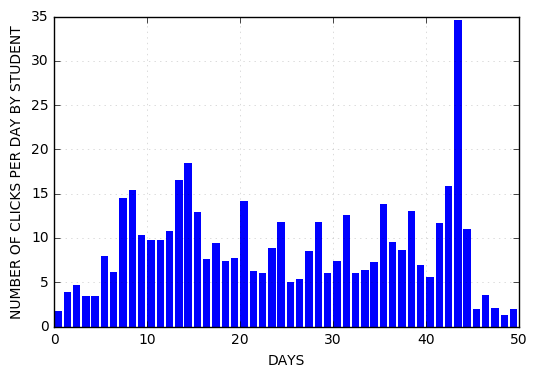

In [124]:
avg_nclicks = np.mean(nclicks_per_day_mat, axis=0)
fig = plt.figure(figsize=(6,4))
plt.bar(range(max_days), avg_nclicks, linewidth=0, figure=fig)
plt.xlabel('DAYS')
plt.ylabel('NUMBER OF CLICKS PER DAY BY STUDENT')
plt.grid(alpha=0.2)

# Save figure
barplot_fname = './barplot.pdf'
plt.savefig(barplot_fname)

### Plot heatmap using `plt.imshow()`
Documentation : http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow <br>
Plot `nclicks_per_day_mat` matrix

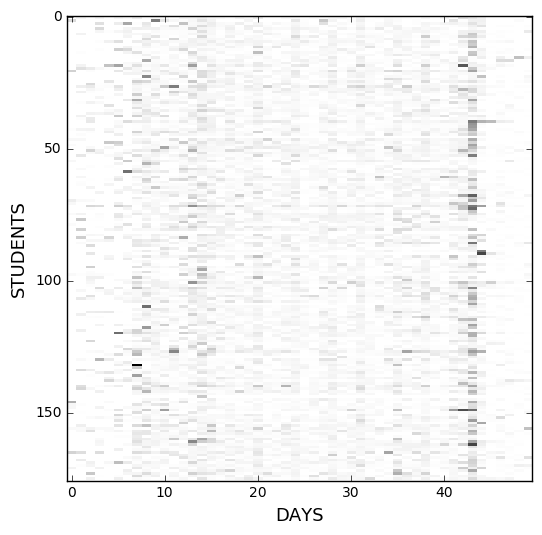

In [140]:
fig = plt.figure(figsize=(6,6))
plt.imshow(nclicks_per_day_mat, interpolation='nearest', aspect='auto', cmap='Greys', figure=fig)
plt.xlabel('DAYS', fontsize=13)
plt.ylabel('STUDENTS', fontsize=13)

## To remove x and y ticks
# plt.xticks([])
# plt.yticks([])

# Part 5 : Different Click Matrices

Taking subset of the data by data types (e.g. by categories, preview activities.. )

### Number of *category* clicks for each student 

In [141]:
# For each student, return a row
def get_nclicks_per_day_cat(student_data, category='homepage', max_days=50, first_day=datetime(2016,6,13,0,0,0)):
    nclicks_per_day_1 = np.zeros(max_days, dtype=np.int32)

    for i, time in enumerate(student_data['created_at']):
        cat = get_cats_from_url(student_data['url'][i])
        if cat == category:
            delta = time - first_day
            if delta.days < max_days:
                nclicks_per_day_1[delta.days] += 1
    return nclicks_per_day_1

### Get a matrix of number of *homepage* clicks

In [142]:
get_nclicks_per_day_cat(student_data, category='homepage')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 9, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [143]:
n_students = len(data)
max_days = 50

nclicks_per_day_mat_hp = np.zeros((n_students, max_days), dtype=np.int32)
idx = 0
for rid in data.keys():
    nclicks_per_day_mat_hp[idx] = get_nclicks_per_day_cat(data[rid], category='homepage')
    idx += 1

### Exercise : Save the matrix

### Exercise : Plot the matrix using `plt.imshow()`